In [48]:
import numpy as np
import pushers.gr_pushers
from pushers.gr_pushers import IntegrateTrajectory
import pushers.metrics as metrics
import matplotlib.pyplot as plt
from progiter import ProgIter
import importlib

In [39]:
def x_Sph2Cart(x):
    """
    Converts from spherical to cartesian coordinates.

    Parameters
    ----------
    x : np.array (n x 3)
        contravariant coordinate x^i

    Returns
    -------
    np.array (n x 3)
        cartesian coordinate x^i
    """
    xcart = np.zeros(x.shape)
    xcart[:, :, 0] = x[:, :, 0] * np.sin(x[:, :, 1]) * np.cos(x[:, :, 2])
    xcart[:, :, 1] = x[:, :, 0] * np.sin(x[:, :, 1]) * np.sin(x[:, :, 2])
    xcart[:, :, 2] = x[:, :, 0] * np.cos(x[:, :, 1])
    return xcart

def x_Cart2Sph(x):
    """
    Converts from spherical to cartesian coordinates.

    Parameters
    ----------
    x : np.array (n x 3)
        contravariant coordinate x^i

    Returns
    -------
    np.array (n x 3)
        cartesian coordinate x^i
    """
    xsph = np.zeros(x.shape)
    
    xsph[:, :, 0] = np.sqrt(x[:, :, 0]**2 + x[:, :, 1]**2 + x[:, :, 2]**2)
    xsph[:, :, 1] = np.arccos(x[:, :, 2]/np.sqrt(x[:, :, 0]**2 + x[:, :, 1]**2 + x[:, :, 2]**2))
    xsph[:, :, 2] = np.arctan2(x[:, :, 1], x[:, :, 0])
    return xsph

## Kerr 3-Leaf Orbit

In [20]:
E = 0.920250
L = 2
a = 0.995
r = 10.649753539480976

x = np.array([[r, np.pi/2, 0]])
u = np.array([[(-a * L + 2 * r * E)/(a**2 + (-2 + r) * r), 0, L]])
dt = 1e-2
tmax = 1e3
metric = metrics.Kerr_KS(a)

ts, xs, us = IntegrateTrajectory(
    metric,
    x,
    u, 
    dt,
    tmax,
    D_func = lambda _: np.array([[0, 0, 0]]),
    B_func = lambda _: np.array([[0, 0, 0]]),
    progressbar = ProgIter
)

 100.00% 100000/100000... rate=529.48 Hz, eta=0:00:00, total=0:03:08


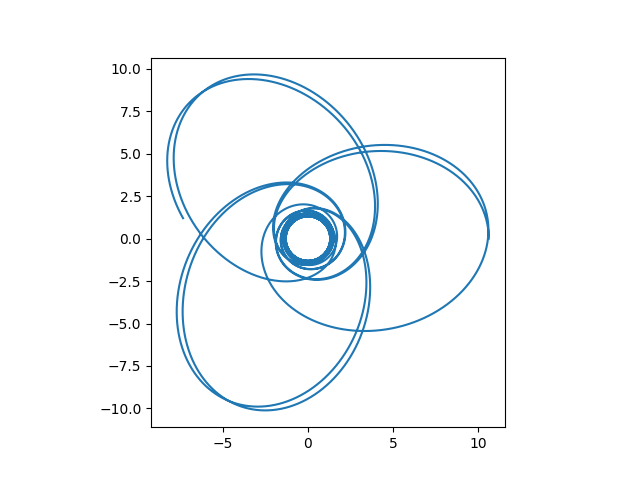

In [40]:
xs_cart = x_Sph2Cart(xs)
x = xs_cart[:, 0, 0]
y = xs_cart[:, 0, 1]
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect(1)
plt.show()

## Michel's Monopole

In [142]:
Om0 = 1e-1
B0 = 1e3

def B_field(x):
    n = x.shape[0]
    Rs = 1
    r = x[:, 0]
    Om = Om0 * np.array([1, 0, 0])
    v = x[:, 0] * Om[0] * np.sin(x[:, 1])
    Et = -v * (Rs / r)**2 * B0
    return np.array([B0 * (Rs / r)**2, np.zeros(n), Et]).T

def D_field(x):
    n = x.shape[0]
    Rs = 1
    r = x[:, 0]
    Om = Om0 * np.array([1, 0, 0])
    v = x[:, 0] * Om[0] * np.sin(x[:, 1])
    Et = -v * (Rs / r)**2 * B0
    return np.array([np.zeros(n), Et, np.zeros(n)]).T

dt = 1e-3
tmax = 2e2
metric = metrics.Minkowski()
x0 = np.array([[2, np.pi/2, 0]])
u0 = np.array([[0, 0, 0]])

t2s, x2s, u2s = IntegrateTrajectory(
    metric,
    x0,
    u0, 
    dt,
    tmax,
    D_func = D_field,
    B_func = B_field,
    pusher_type = "gca",
    progressbar = ProgIter
)

t2s_boris, x2s_boris, u2s_boris = IntegrateTrajectory(
    metric,
    x0,
    u0, 
    dt,
    tmax,
    D_func = D_field,
    B_func = B_field,
    progressbar = ProgIter
)

 100.00% 200000/200000... rate=726.18 Hz, eta=0:00:00, total=0:04:46


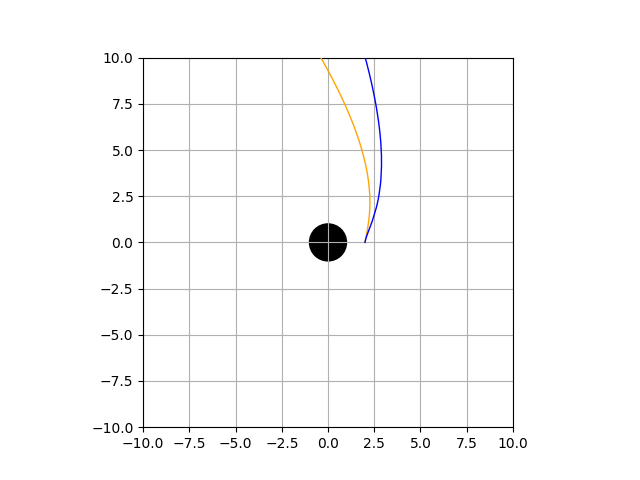

In [159]:
x2s_cart = x_Sph2Cart(x2s)
x2s_boris_cart = x_Sph2Cart(x2s_boris)
x = x2s_cart[:, 0, 0][::1]
y = x2s_cart[:, 0, 1][::1]
xboris = x2s_boris_cart[:, 0, 0][::1]
yboris = x2s_boris_cart[:, 0, 1][::1]

fig, ax = plt.subplots()
ax.add_artist(plt.Circle((0, 0), 1, fill = True, color = 'black'))
ax.plot(x, y, linewidth = 1, c = 'orange', zorder = 10)
ax.plot(xboris, yboris, linewidth = 1, c = 'blue', zorder = 10)
ax.set(xlim=(-10, 10), ylim=(-10, 10))
ax.set_aspect('equal')
ax.grid(True, which='both')
plt.show()

In [8]:
def michel(r): #r = (radius) / (light cylinder radius)
    return np.sqrt(1 + r ** 2)